In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from sklearn.manifold import TSNE

In [5]:
# Loading the iris datset
from sklearn.datasets import load_iris
iris = load_iris()

In [8]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
help(TSNE)

Help on class TSNE in module sklearn.manifold.t_sne:

class TSNE(sklearn.base.BaseEstimator)
 |  t-distributed Stochastic Neighbor Embedding.
 |  
 |  t-SNE [1] is a tool to visualize high-dimensional data. It converts
 |  similarities between data points to joint probabilities and tries
 |  to minimize the Kullback-Leibler divergence between the joint
 |  probabilities of the low-dimensional embedding and the
 |  high-dimensional data. t-SNE has a cost function that is not convex,
 |  i.e. with different initializations we can get different results.
 |  
 |  It is highly recommended to use another dimensionality reduction
 |  method (e.g. PCA for dense data or TruncatedSVD for sparse data)
 |  to reduce the number of dimensions to a reasonable amount (e.g. 50)
 |  if the number of features is very high. This will suppress some
 |  noise and speed up the computation of pairwise distances between
 |  samples. For more tips see Laurens van der Maaten's FAQ [2].
 |  
 |  Read more in the 

In [28]:
from sklearn.manifold import TSNE
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
# X_embedded = TSNE(n_components=2).fit_transform(iris.data)
X_embedded = TSNE(learning_rate = 100).fit_transform(iris.data)
X_embedded.shape

(150, 2)

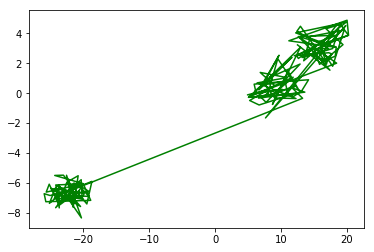

In [29]:
plt.plot( X_embedded[:,0], X_embedded[:,1] , 'g')

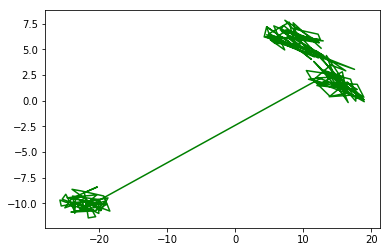

In [26]:
plt.plot( X_embedded[:,0], X_embedded[:,1] , 'g')

In [27]:
X_embedded[:,0]

array([-22.794207 , -20.08789  , -20.097242 , -19.701225 , -22.88455  ,
       -24.744394 , -20.368147 , -22.037226 , -18.913137 , -20.614525 ,
       -24.293297 , -21.25682  , -19.809494 , -18.74033  , -25.614143 ,
       -25.805782 , -24.8938   , -22.835783 , -25.083088 , -23.868017 ,
       -23.621763 , -23.500349 , -20.3046   , -22.201345 , -21.636562 ,
       -20.552782 , -22.149515 , -23.21512  , -22.803593 , -20.464443 ,
       -20.413975 , -23.614662 , -24.944864 , -25.472944 , -20.614525 ,
       -21.31995  , -24.18251  , -20.614525 , -19.019522 , -22.424942 ,
       -22.401138 , -18.465916 , -19.361673 , -22.64674  , -24.02684  ,
       -19.7762   , -23.958145 , -19.88018  , -24.039722 , -21.682901 ,
        10.997775 ,  12.689735 ,  10.7431965,  17.558247 ,  12.183967 ,
        15.744366 ,  12.764938 ,  18.91881  ,  12.04272  ,  17.902039 ,
        18.879566 ,  15.2617855,  16.575157 ,  13.524249 ,  17.912811 ,
        11.977924 ,  15.714274 ,  16.374666 ,  13.786665 ,  17.2

In [23]:
X_embedded[:,1]

array([-231.1655 , -147.38359, -262.18234, -116.36655], dtype=float32)

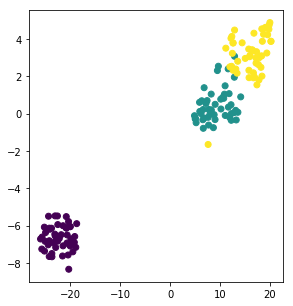

In [38]:
figure(figsize = (10,5) )
subplot(121)
scatter(X_embedded[:,0], X_embedded[:,1], c = iris.target  )

In [46]:
x_min = X_embedded[:,0].min()

In [47]:
x_max = X_embedded[:,0].max()

In [48]:
y_min = X_embedded[:,1].min()
y_max = X_embedded[:,1].max()

In [49]:
Limts = [ [ x_min , x_max] , [y_min, y_max] ]

In [50]:
Limts

[[-25.9487, 20.243372], [-8.339147, 4.883639]]

In [89]:
def find_good_size(Limits,windowSize):
    x_min = Limits[0][0]
    x_max = Limits[0][1]
    y_min = Limits[1][0]
    y_max = Limits[1][1]
    from math import floor , ceil
    # Clean the matrix
    x_min = floor(x_min)
    x_max = ceil(x_max)
    y_min = floor(y_min)
    y_max = ceil(y_max)
    
    # Printing the cleaend up values.
    print(x_min,x_max,y_min, y_max)
    
    # Fitting the size to handle the windows
    a = (x_max - x_min) % windowSize
    b = (y_max - y_min) % windowSize
    
    if ( (x_max + a) % windowSize == 0):
        x_max = x_max + a
    else:
        x_max = x_max + (windowSize - a)
    
    if ( (y_max + b) % windowSize == 0):
        y_max = y_max + b
    else:
        y_max = y_max + (windowSize - b)
        
    print("You Can use this matrix now.")
    print("X_min=",x_min)
    print("X_max=",x_max)
    print("Y_min=",y_min)
    print("Y_max=",y_max)
    print("And the Matrix Shape:", (x_max - x_min) , " * ", (y_max - y_min))
    return [[x_min,x_max],[y_min,y_max]]
    

In [90]:
find_good_size(Limts,1)

-26 21 -9 5
You Can use this matrix now.
X_min= -26
X_max= 21
Y_min= -9
Y_max= 5
And the Matrix Shape: 47  *  14


[[-26, 21], [-9, 5]]

In [66]:
find_good_size(Limts,10)

-26 21 -9 5
You Can use this matrix now.
X_min= -26
X_max= 24
Y_min= -9
Y_max= 11
And the Matrix Shape: 50  *  20


[[-26, 24], [-9, 11]]

In [91]:
def tell_windows(Limts,windowSize):
    g = find_good_size(Limts,windowSize)
    # Going Row Wise:
    count = 0
    for i in range(g[0][0],g[0][1],windowSize):
        for j in range(g[1][0],g[1][1],windowSize):
            count += 1
            print("<Window:",count,">","X:[", i, ",", i +windowSize , "]" , "Y:[", j, ",", j+ windowSize ,"]")
    print("Total Count:",count)
    ans = (g[0][1]-g[0][0])*(g[1][1]-g[1][0]) // (windowSize ** 2)
    print("Expected Count:",ans)
    print("OKAY:", count == ans )

In [93]:
tell_windows([[0,3],[0,3]],1)

0 3 0 3
You Can use this matrix now.
X_min= 0
X_max= 3
Y_min= 0
Y_max= 3
And the Matrix Shape: 3  *  3
<Window: 1 > X:[ 0 , 1 ] Y:[ 0 , 1 ]
<Window: 2 > X:[ 0 , 1 ] Y:[ 1 , 2 ]
<Window: 3 > X:[ 0 , 1 ] Y:[ 2 , 3 ]
<Window: 4 > X:[ 1 , 2 ] Y:[ 0 , 1 ]
<Window: 5 > X:[ 1 , 2 ] Y:[ 1 , 2 ]
<Window: 6 > X:[ 1 , 2 ] Y:[ 2 , 3 ]
<Window: 7 > X:[ 2 , 3 ] Y:[ 0 , 1 ]
<Window: 8 > X:[ 2 , 3 ] Y:[ 1 , 2 ]
<Window: 9 > X:[ 2 , 3 ] Y:[ 2 , 3 ]
Total Count: 9
Expected Count: 9
OKAY: True


In [94]:
tell_windows([[0,3],[0,3]],3)

0 3 0 3
You Can use this matrix now.
X_min= 0
X_max= 3
Y_min= 0
Y_max= 3
And the Matrix Shape: 3  *  3
<Window: 1 > X:[ 0 , 3 ] Y:[ 0 , 3 ]
Total Count: 1
Expected Count: 1
OKAY: True


In [95]:
tell_windows([[0,3],[0,3]],5)

0 3 0 3
You Can use this matrix now.
X_min= 0
X_max= 5
Y_min= 0
Y_max= 5
And the Matrix Shape: 5  *  5
<Window: 1 > X:[ 0 , 5 ] Y:[ 0 , 5 ]
Total Count: 1
Expected Count: 1
OKAY: True


In [77]:
Limts

[[-25.9487, 20.243372], [-8.339147, 4.883639]]

In [96]:
tell_windows(Limts,3)

-26 21 -9 5
You Can use this matrix now.
X_min= -26
X_max= 22
Y_min= -9
Y_max= 6
And the Matrix Shape: 48  *  15
<Window: 1 > X:[ -26 , -23 ] Y:[ -9 , -6 ]
<Window: 2 > X:[ -26 , -23 ] Y:[ -6 , -3 ]
<Window: 3 > X:[ -26 , -23 ] Y:[ -3 , 0 ]
<Window: 4 > X:[ -26 , -23 ] Y:[ 0 , 3 ]
<Window: 5 > X:[ -26 , -23 ] Y:[ 3 , 6 ]
<Window: 6 > X:[ -23 , -20 ] Y:[ -9 , -6 ]
<Window: 7 > X:[ -23 , -20 ] Y:[ -6 , -3 ]
<Window: 8 > X:[ -23 , -20 ] Y:[ -3 , 0 ]
<Window: 9 > X:[ -23 , -20 ] Y:[ 0 , 3 ]
<Window: 10 > X:[ -23 , -20 ] Y:[ 3 , 6 ]
<Window: 11 > X:[ -20 , -17 ] Y:[ -9 , -6 ]
<Window: 12 > X:[ -20 , -17 ] Y:[ -6 , -3 ]
<Window: 13 > X:[ -20 , -17 ] Y:[ -3 , 0 ]
<Window: 14 > X:[ -20 , -17 ] Y:[ 0 , 3 ]
<Window: 15 > X:[ -20 , -17 ] Y:[ 3 , 6 ]
<Window: 16 > X:[ -17 , -14 ] Y:[ -9 , -6 ]
<Window: 17 > X:[ -17 , -14 ] Y:[ -6 , -3 ]
<Window: 18 > X:[ -17 , -14 ] Y:[ -3 , 0 ]
<Window: 19 > X:[ -17 , -14 ] Y:[ 0 , 3 ]
<Window: 20 > X:[ -17 , -14 ] Y:[ 3 , 6 ]
<Window: 21 > X:[ -14 , -11 ] Y:[ -9

In [103]:
# Okay So now We have a function which finds the windows we just now need to calculate the entropy in this window.
def calEntropy(window,label):
    'Takes: [x_min, x_max],[y_min, y_max]'
    'returns entropy of the window'
    x_min, x_max , y_min, y_max = window
    # Set up entropy to be zero
    en = 0
    from math import log
    c = [0,0,0]
    # Calculate the number of samples in this window.
    # X_embedded stores the data.
    for i in range(150):
        cx = X_embedded[i][0]
        cy = X_embedded[i][1]
        if x_min <= cx <=x_max and y_min <= cy <= y_max:
            print("Found a sample of class:",label[i])
            c[label[i]] += 1
    t = c[0] + c[1] + c[2]
    for i in c:
        if i!= 0:
            en += - ( i/t * log(i/t) )
    print("Found Entropy:",en)
    return en   

In [109]:
def tell_windows(Limts,windowSize,target):
    g = find_good_size(Limts,windowSize)
    # Going Row Wise:
    total_ent = 0
    count = 0
    for i in range(g[0][0],g[0][1],windowSize):
        for j in range(g[1][0],g[1][1],windowSize):
            count += 1
            print("<Window:",count,">","X:[", i, ",", i +windowSize , "]" , "Y:[", j, ",", j+ windowSize ,"]")
            total_ent += calEntropy([i,windowSize+i, j, windowSize+j], target)
    print("Total Count:",count)
    ans = (g[0][1]-g[0][0])*(g[1][1]-g[1][0]) // (windowSize ** 2)
    print("Expected Count:",ans)
    print("OKAY:", count == ans )
    print("-----Done----",total_ent)
    return total_ent

Plotting the data with Noise =>  0  %
Done!
-26 21 -9 5
You Can use this matrix now.
X_min= -26
X_max= 22
Y_min= -9
Y_max= 6
And the Matrix Shape: 48  *  15
<Window: 1 > X:[ -26 , -23 ] Y:[ -9 , -6 ]
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found Entropy: 0.0
<Window: 2 > X:[ -26 , -23 ] Y:[ -6 , -3 ]
Found a sample of class: 0
Found a sample of class: 0
Found Entropy: 0.0
<Window: 3 > X:[ -26 , -23 ] Y:[ -3 , 0 ]
Found Entropy: 0
<Window: 4 > X:[ -26 , -23 ] Y:[ 0 , 3 ]
Found Entropy: 0
<Window: 5 > X:[ -26 , -23 ] Y:[ 3 , 6 ]
Found Entropy: 0
<Win

1.9059782130166705

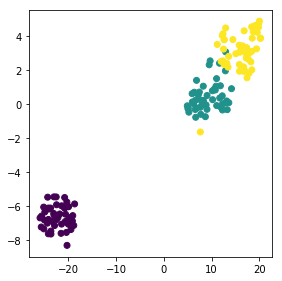

In [110]:
tell_windows(Limts,3, add_noise(0))

In [113]:
def add_noise(percentage):
    'Adds the given percentage of noise to the iris data and returns the new data'
    # Original 
    target = [0 for i in range(50)] + [ 1 for i in range(50)] + [ 2 for i in range(50)]  
    # 0   - 50   : class 0 
    # 50 - 100   : class 1
    # 100 - 150  : class 2
    # We will change the labels in a class label randomly
    import random
    # Offset for percentage => (window size)* precentage
    offset = 50 * percentage // 100
    for i in range(0, 0 + offset ):
        target[i] = random.choice([1,2])
    for i in range(50, 50 + offset):
        target[i] = random.choice([0,2])
    for i in range(100,100 + offset):
        target[i] = random.choice([0,1])
    
    # Got the new labeled data
    # Now we can plot the tsne with this.
    #print("Plotting the data with Noise => ", percentage , " %")
    figure( figsize = (20,10))
    subplot(242)
    scatter(X_embedded[:,0], X_embedded[:,1], c = target)
    print("Done!")
    return target

In [115]:

def main(windowSize, noise):
    return tell_windows(Limts,windowSize,add_noise(noise))

Done!
-26 21 -9 5
You Can use this matrix now.
X_min= -26
X_max= 22
Y_min= -9
Y_max= 6
And the Matrix Shape: 48  *  15
<Window: 1 > X:[ -26 , -23 ] Y:[ -9 , -6 ]
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found Entropy: 0.0
<Window: 2 > X:[ -26 , -23 ] Y:[ -6 , -3 ]
Found a sample of class: 0
Found a sample of class: 0
Found Entropy: 0.0
<Window: 3 > X:[ -26 , -23 ] Y:[ -3 , 0 ]
Found Entropy: 0
<Window: 4 > X:[ -26 , -23 ] Y:[ 0 , 3 ]
Found Entropy: 0
<Window: 5 > X:[ -26 , -23 ] Y:[ 3 , 6 ]
Found Entropy: 0
<Window: 6 > X:[ -23 , -20 ] Y:[ -9 , -6 ]

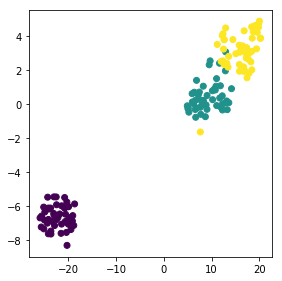

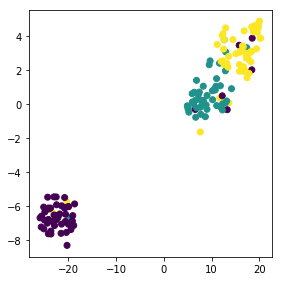

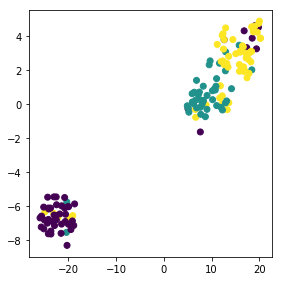

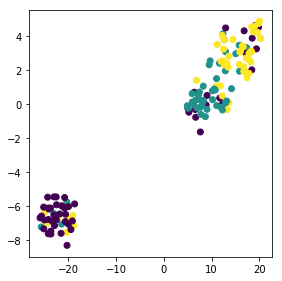

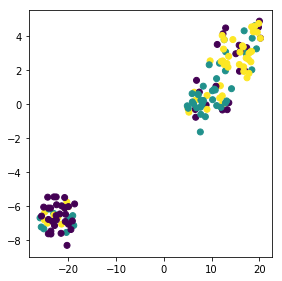

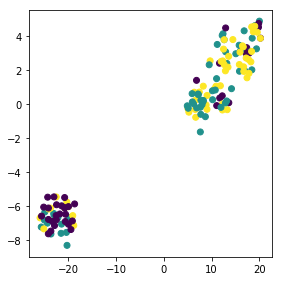

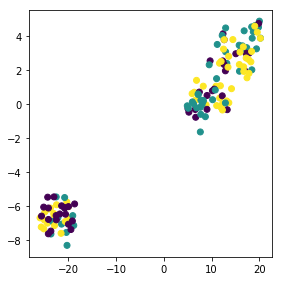

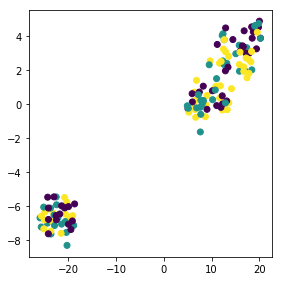

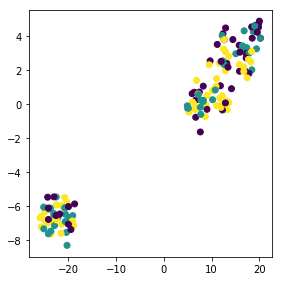

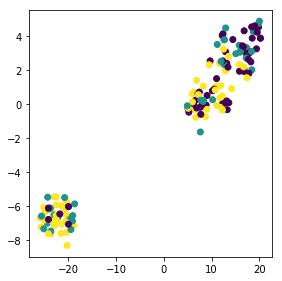

In [117]:
xxxx = []
yyyy = []
for i in range(0,100,10):
    xxxx.append(i)
    yyyy.append(main(3,i))

In [118]:
xxxx

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [119]:
yyyy

[1.9059782130166705,
 5.833869503703472,
 8.146882998185937,
 10.507330121040468,
 13.927450011307299,
 14.301825684532538,
 12.619612365784652,
 15.087570013154586,
 13.689747163330022,
 13.465812334559693]

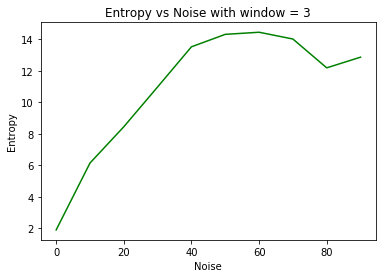

In [120]:
plt.plot(x,y,'g')
plt.xlabel('Noise')
plt.ylabel('Entropy')
plt.title('Entropy vs Noise with window = 3')
plt.show()

Done!
-26 21 -9 5
You Can use this matrix now.
X_min= -26
X_max= 21
Y_min= -9
Y_max= 5
And the Matrix Shape: 47  *  14
<Window: 1 > X:[ -26 , -25 ] Y:[ -9 , -8 ]
Found Entropy: 0
<Window: 2 > X:[ -26 , -25 ] Y:[ -8 , -7 ]
Found a sample of class: 0
Found a sample of class: 0
Found Entropy: 0.0
<Window: 3 > X:[ -26 , -25 ] Y:[ -7 , -6 ]
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found Entropy: 0.0
<Window: 4 > X:[ -26 , -25 ] Y:[ -6 , -5 ]
Found Entropy: 0
<Window: 5 > X:[ -26 , -25 ] Y:[ -5 , -4 ]
Found Entropy: 0
<Window: 6 > X:[ -26 , -25 ] Y:[ -4 , -3 ]
Found Entropy: 0
<Window: 7 > X:[ -26 , -25 ] Y:[ -3 , -2 ]
Found Entropy: 0
<Window: 8 > X:[ -26 , -25 ] Y:[ -2 , -1 ]
Found Entropy: 0
<Window: 9 > X:[ -26 , -25 ] Y:[ -1 , 0 ]
Found Entropy: 0
<Window: 10 > X:[ -26 , -25 ] Y:[ 0 , 1 ]
Found Entropy: 0
<Window: 11 > X:[ -26 , -25 ] Y:[ 1 , 2 ]
Found Entropy: 0
<Window: 12 > X:[ -26 , -25 ] Y:[ 2 , 3 ]
Found Entropy: 0

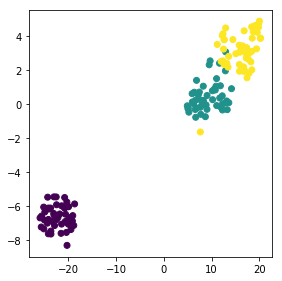

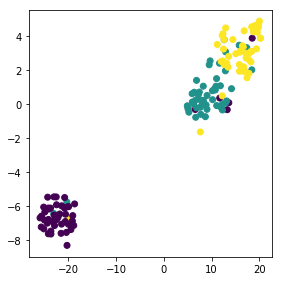

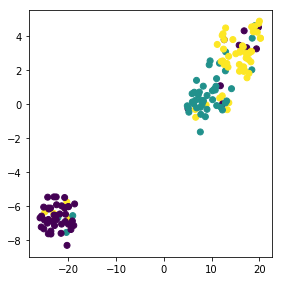

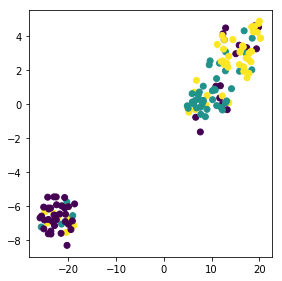

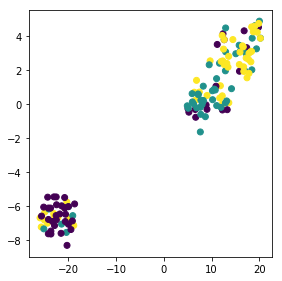

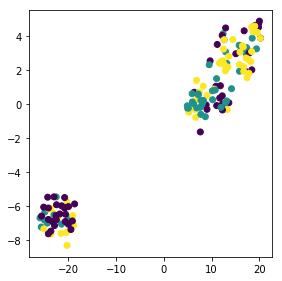

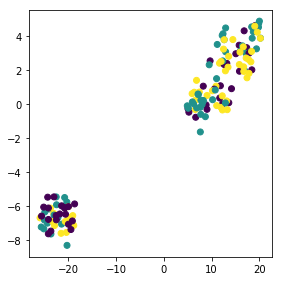

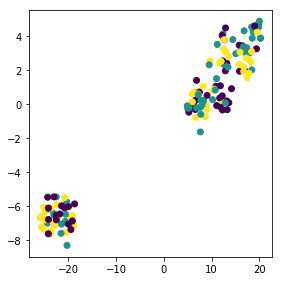

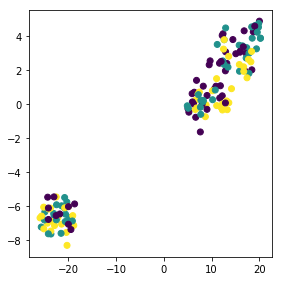

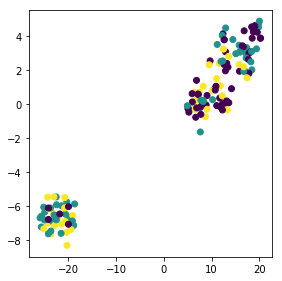

In [121]:
xxxx = []
yyyy = []
for i in range(0,100,10):
    xxxx.append(i)
    yyyy.append(main(1,i))

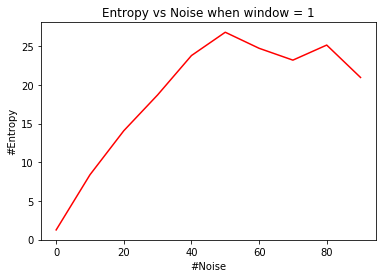

In [122]:
plt.plot(xxxx,yyyy,'r')
plt.xlabel('#Noise')
plt.ylabel('#Entropy')
plt.title('Entropy vs Noise when window = 1')
plt.show()

Done!
-26 21 -9 5
You Can use this matrix now.
X_min= -26
X_max= 21
Y_min= -9
Y_max= 5
And the Matrix Shape: 47  *  14
<Window: 1 > X:[ -26 , -25 ] Y:[ -9 , -8 ]
Found Entropy: 0
<Window: 2 > X:[ -26 , -25 ] Y:[ -8 , -7 ]
Found a sample of class: 0
Found a sample of class: 0
Found Entropy: 0.0
<Window: 3 > X:[ -26 , -25 ] Y:[ -7 , -6 ]
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found a sample of class: 0
Found Entropy: 0.0
<Window: 4 > X:[ -26 , -25 ] Y:[ -6 , -5 ]
Found Entropy: 0
<Window: 5 > X:[ -26 , -25 ] Y:[ -5 , -4 ]
Found Entropy: 0
<Window: 6 > X:[ -26 , -25 ] Y:[ -4 , -3 ]
Found Entropy: 0
<Window: 7 > X:[ -26 , -25 ] Y:[ -3 , -2 ]
Found Entropy: 0
<Window: 8 > X:[ -26 , -25 ] Y:[ -2 , -1 ]
Found Entropy: 0
<Window: 9 > X:[ -26 , -25 ] Y:[ -1 , 0 ]
Found Entropy: 0
<Window: 10 > X:[ -26 , -25 ] Y:[ 0 , 1 ]
Found Entropy: 0
<Window: 11 > X:[ -26 , -25 ] Y:[ 1 , 2 ]
Found Entropy: 0
<Window: 12 > X:[ -26 , -25 ] Y:[ 2 , 3 ]
Found Entropy: 0

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


 0
<Window: 12 > X:[ -11 , -6 ] Y:[ 1 , 6 ]
Found Entropy: 0
<Window: 13 > X:[ -6 , -1 ] Y:[ -9 , -4 ]
Found Entropy: 0
<Window: 14 > X:[ -6 , -1 ] Y:[ -4 , 1 ]
Found Entropy: 0
<Window: 15 > X:[ -6 , -1 ] Y:[ 1 , 6 ]
Found Entropy: 0
<Window: 16 > X:[ -1 , 4 ] Y:[ -9 , -4 ]
Found Entropy: 0
<Window: 17 > X:[ -1 , 4 ] Y:[ -4 , 1 ]
Found Entropy: 0
<Window: 18 > X:[ -1 , 4 ] Y:[ 1 , 6 ]
Found Entropy: 0
<Window: 19 > X:[ 4 , 9 ] Y:[ -9 , -4 ]
Found Entropy: 0
<Window: 20 > X:[ 4 , 9 ] Y:[ -4 , 1 ]
Found a sample of class: 1
Found a sample of class: 1
Found a sample of class: 1
Found a sample of class: 1
Found a sample of class: 1
Found a sample of class: 1
Found a sample of class: 1
Found a sample of class: 1
Found a sample of class: 1
Found a sample of class: 1
Found a sample of class: 1
Found a sample of class: 1
Found a sample of class: 1
Found a sample of class: 1
Found a sample of class: 1
Found a sample of class: 1
Found a sample of class: 1
Found a sample of class: 1
Found a samp

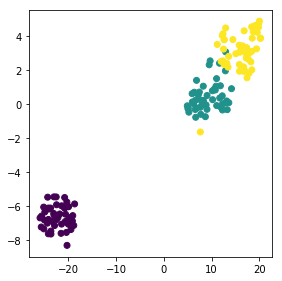

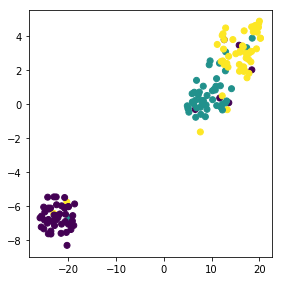

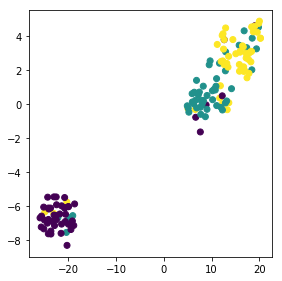

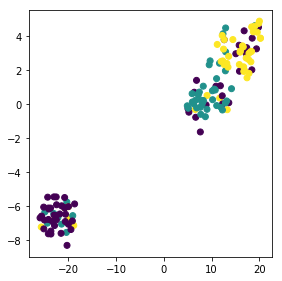

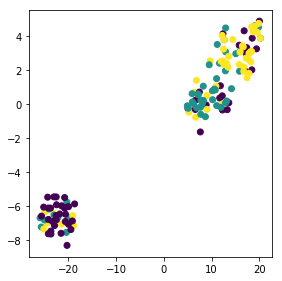

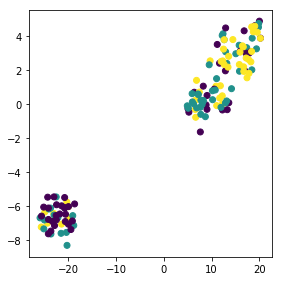

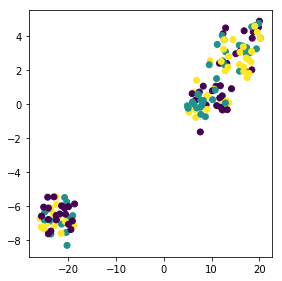

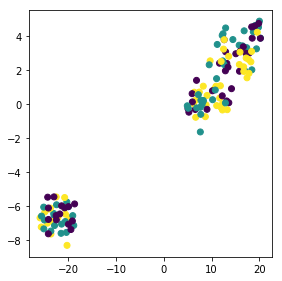

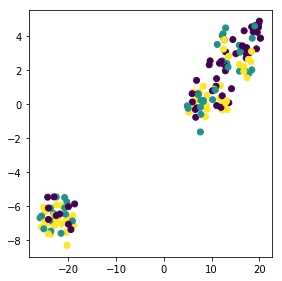

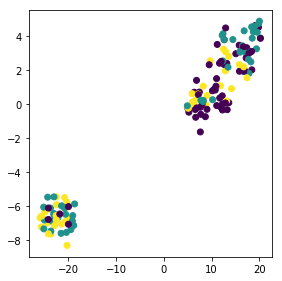

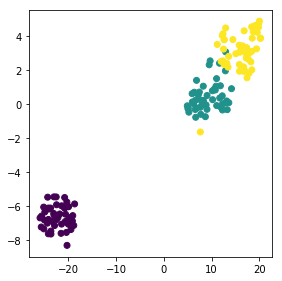

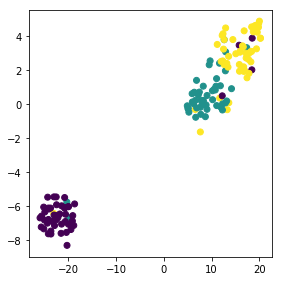

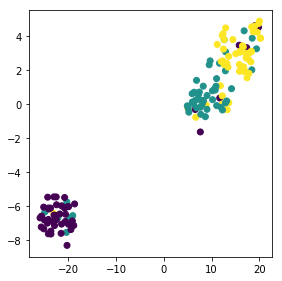

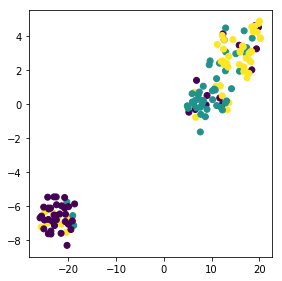

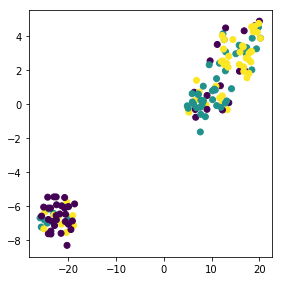

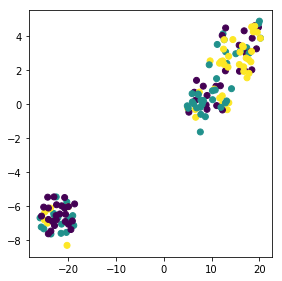

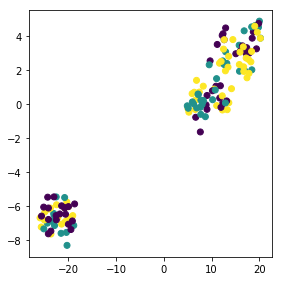

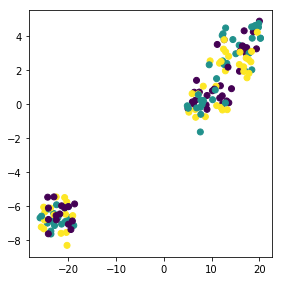

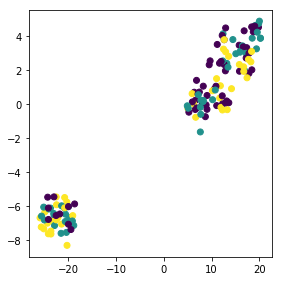

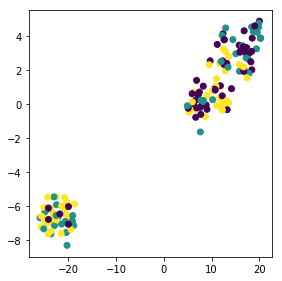

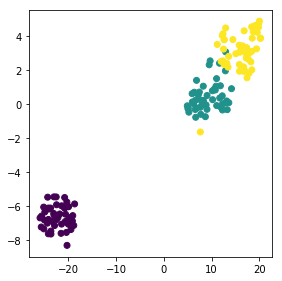

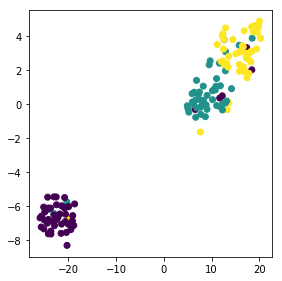

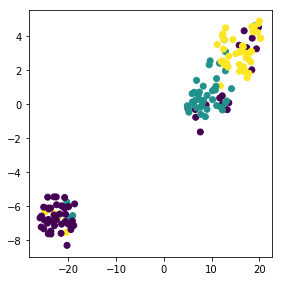

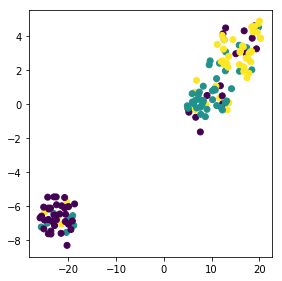

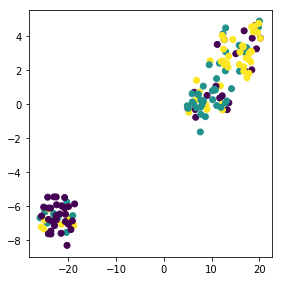

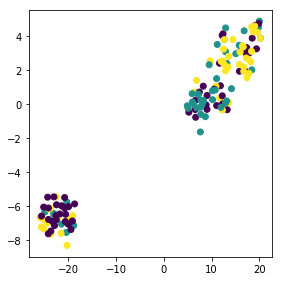

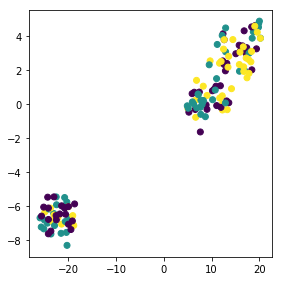

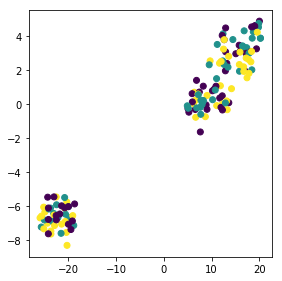

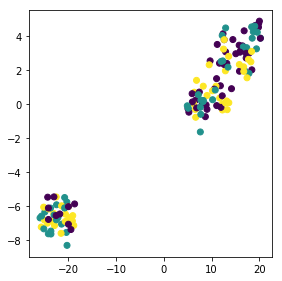

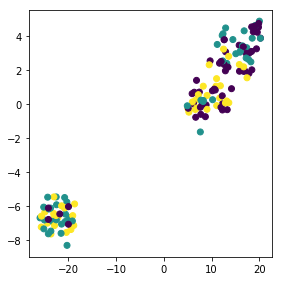

In [123]:
dataSet= [ [[],[]], [[],[]], [[],[]], [[],[]] , [[],[]], [[],[]] ]
for window in [1,3,5]:
    for i in range(0,100,10):
        dataSet[window][0].append(i)
        dataSet[window][1].append(main(window,i))

In [126]:
dataSet

[[[], []],
 [[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
  [1.2554823251787535,
   8.73851878067532,
   13.853681503172105,
   18.878635726235473,
   25.02940503282032,
   28.127269243771856,
   26.30719326841124,
   25.858124148322695,
   21.792007983531576,
   22.716655925390782]],
 [[], []],
 [[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
  [1.9059782130166705,
   5.906832364815045,
   8.501479237313205,
   10.879963858860972,
   14.168158576926993,
   14.028571586277163,
   14.32908036737314,
   13.426159812900783,
   12.847992308871694,
   13.64677921343577]],
 [[], []],
 [[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
  [0.8377336454040922,
   3.1059009623027247,
   4.348245698116212,
   6.66788264811653,
   7.452498242994488,
   7.6894883073824065,
   7.321481995767062,
   7.438085109160104,
   6.891550087350982,
   7.177780753797773]]]

In [131]:
print("The final plots are")
def plotter(i):
    plt.plot(dataSet[i][0],dataSet[i][1])
    plt.title('Window Size = ' + str(i))
    plt.xlabel('Noise')
    plt.ylabel('Entropy')  

The final plots are


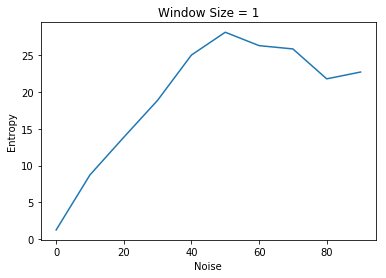

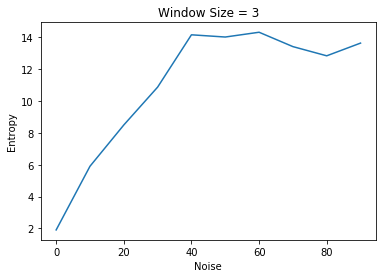

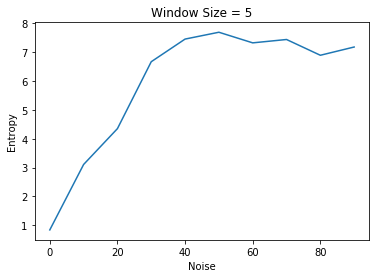

In [130]:
plotter(1)
plotter(3)
plotter(5)

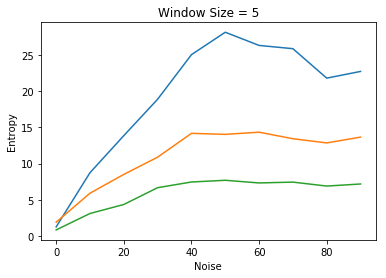

In [132]:
plotter(1)
plotter(3)
plotter(5)
plt.show()

In [133]:
# Done !